## Import Dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

## Import Cleaned Dataset

In [2]:
data = pd.read_csv("data/sub_dataset.csv")
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Sweden,1990,male,75+ years,144,261500,55.07,Sweden1990,0.815,"258,154,283,909",32246,G.I. Generation
1,Sweden,1990,male,55-74 years,287,798100,35.96,Sweden1990,0.815,"258,154,283,909",32246,G.I. Generation
2,Sweden,1990,male,35-54 years,340,1174000,28.96,Sweden1990,0.815,"258,154,283,909",32246,Silent
3,Sweden,1990,male,25-34 years,157,606600,25.88,Sweden1990,0.815,"258,154,283,909",32246,Boomers
4,Sweden,1990,female,55-74 years,138,883800,15.61,Sweden1990,0.815,"258,154,283,909",32246,G.I. Generation


## Analyse Year Factor

In [3]:
# Group by Year

groupby_yr=data.groupby("year")
year_sum = groupby_yr["suicides_no"].sum()
year_sum.head()

year
1990    161838
1991    162310
1992    170801
1993    183064
1994    189759
Name: suicides_no, dtype: int64

In [4]:
# Total suicides number and suicides number by Gender Over 1990-2014

male = data.loc[(data["sex"] == "male")]
female = data.loc[(data["sex"] == "female")]

male_sum_yr = male.groupby(['year'])['suicides_no'].sum()
female_sum_yr = female.groupby(['year'])['suicides_no'].sum()

total_population=data.groupby(['year'])['population'].sum()
male_population=male.groupby(['year'])['population'].sum()
female_population=female.groupby(['year'])['population'].sum()

total_rate=year_sum/total_population
male_rate=male_sum_yr/male_population
female_rate=female_sum_yr/female_population

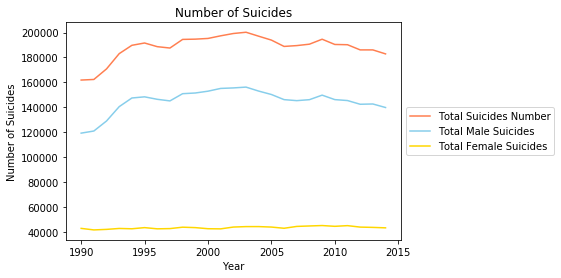

In [5]:
# Plot Number of Suicides by Sex

total_suicides_no = year_sum.plot(kind='line', color="coral",label="Total Suicides Number")
male_sum_yr_plot = male_sum_yr.plot(kind='line', color="skyblue", label="Total Male Suicides")
female_sum_yr_plot = female_sum_yr.plot(kind='line', color="gold", label='Total Female Suicides')


total_suicides_no.set_xlabel("Year")
total_suicides_no.set_ylabel("Number of Suicides")
plt.title("Number of Suicides")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Images/num_suicides.jpg",bbox_inches = "tight")
plt.show()

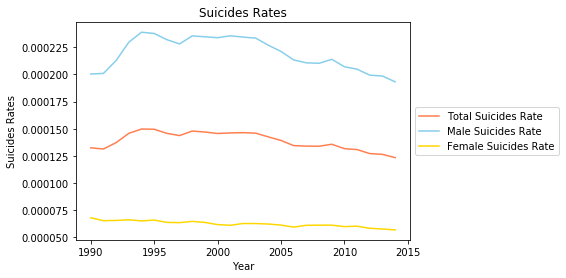

In [6]:
# Plot Suicide Rates by Sex 

total_rate_plot = total_rate.plot(kind='line', color="coral",label="Total Suicides Rate")
male_rate_plot = male_rate.plot(kind='line', color="skyblue", label="Male Suicides Rate")
female_rate_plot = female_rate.plot(kind='line', color="gold", label='Female Suicides Rate')


total_rate_plot.set_xlabel("Year")
total_rate_plot.set_ylabel("Suicides Rates")
plt.title("Suicides Rates")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Images/rate_suicides.jpg",bbox_inches = "tight")
plt.show()

In [7]:
# Suicides Rates VS Country Over 1990-2014

country_year=data.groupby(['year','country'])['suicides_no'].sum()
country_population=data.groupby(['year','country'])['population'].sum()

country_rate=country_year/country_population

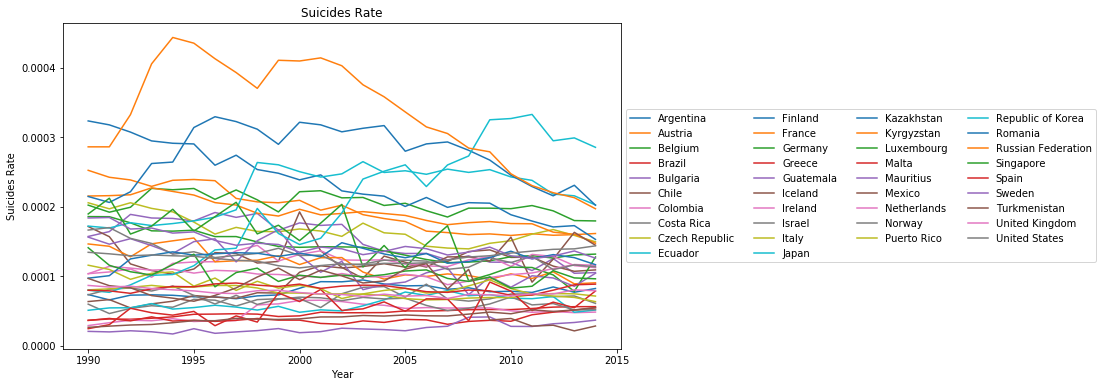

In [8]:
# Plot Suicide Rates By Country

country_rate_plot= country_rate.unstack().plot(kind='line', figsize = (10,6))

country_rate_plot.set_xlabel("Year")
country_rate_plot.set_ylabel("Suicides Rate")
plt.title("Suicides Rate")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=4)
plt.savefig("Images/country_year.jpg",bbox_inches = "tight")

plt.show()

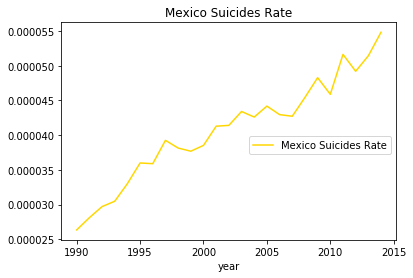

In [9]:
# Specifically look at Suicide Rates in Mexico

mexico = data.loc[(data["country"] == "Mexico")]
mex_suicides = mexico.groupby(['year'])['suicides_no'].sum()
mex_population=mexico.groupby(['year'])['population'].sum()

mex_rate=mex_suicides/mex_population

mex_plot = mex_rate.plot(kind='line', color="gold", label='Mexico Suicides Rate')


total_suicides_no.set_xlabel("Year")
total_suicides_no.set_ylabel("Suicides Rate")
plt.title("Mexico Suicides Rate")

plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.savefig("Images/mex_suicides.jpg",bbox_inches='tight')

plt.show()

In [10]:
# Suicide Rates by Age Over 1990-2014

age_year=data.groupby(['year','age'])['suicides_no'].sum()
age_population=data.groupby(['year','age'])['population'].sum()
age_rate=age_year/age_population

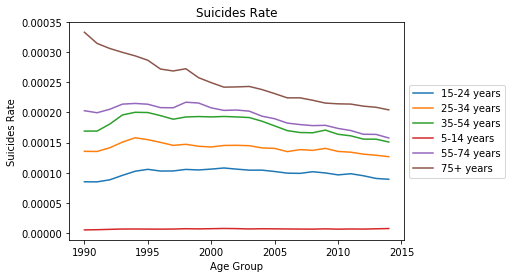

In [11]:
# Plot Suicide Rates by Age

age_rate_plot= age_rate.unstack().plot(kind='line')

age_rate_plot.set_xlabel("Age Group")
age_rate_plot.set_ylabel("Suicides Rate")
plt.title("Suicides Rate")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1)
plt.savefig("Images/age_year.jpg",bbox_inches = "tight")

plt.show()

## Analyse Age/Sex Factor

In [12]:
# Group by Age,Sex

sub_data = data.loc[:,["country","year","sex","age","suicides_no","population","suicides/100k pop"]]
groupby_age_sex = sub_data.groupby(["age","sex"])
groupby_age_sex.count()

country  year  suicides_no  population  suicides/100k pop
age         sex                                                              
15-24 years female      950   950          950         950                950
            male        950   950          950         950                950
25-34 years female      950   950          950         950                950
            male        950   950          950         950                950
35-54 years female      950   950          950         950                950
            male        950   950          950         950                950
5-14 years  female      950   950          950         950                950
            male        950   950          950         950                950
55-74 years female      950   950          950         950                950
            male        950   950          950         950                950
75+ years   female      950   950          950         950                950
            male        950   950          950         950                950

In [13]:
# Create New DataFrame
suicide_sum = pd.DataFrame({"suicides_sum": groupby_age_sex["suicides_no"].sum()})
# Unstack the DataFrame to create bar chart
suicide_sum = suicide_sum.unstack()
suicide_sum

suicides_sum         
sex               female     male
age                              
15-24 years       113466   435073
25-34 years       143549   631340
35-54 years       355754  1368261
5-14 years         11519    24501
55-74 years       297580   859581
75+ years         160053   306630

In [14]:
# Create an index column to sort age group

ind = [2, 3, 4, 1, 5, 6]
suicide_sum["index_col"] = ind
suicide_sum = suicide_sum.sort_values("index_col")['suicides_sum']
suicide_sum

sex,female,male
age,,
5-14 years,11519,24501
15-24 years,113466,435073
25-34 years,143549,631340
35-54 years,355754,1368261
55-74 years,297580,859581
75+ years,160053,306630


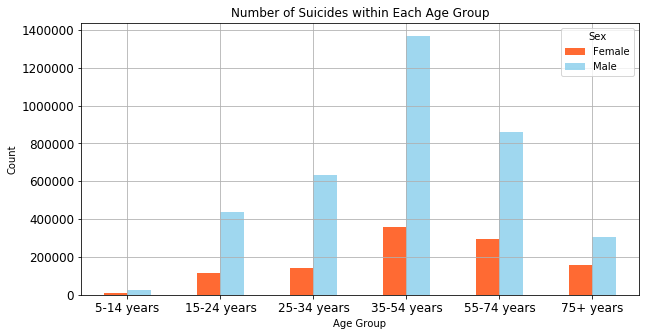

In [15]:
# Plot Number of Suicides by Age Group

suicide_sum.plot(kind="bar", rot = 0, figsize = (10,5), 
                 color = ["orangered","skyblue"], fontsize = 12, alpha = 0.8)

plt.legend(["Female","Male"],title="Sex")
plt.title("Number of Suicides within Each Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.grid()
plt.savefig("Images/age_group_counts.png", bbox_inches = "tight")

plt.show()

In [16]:
# Suicide rate for Each Age Group

suicide_rate = pd.DataFrame({"suicide_rates_%": groupby_age_sex["suicides_no"].sum()/groupby_age_sex["population"].sum()*100})
suicide_rate = suicide_rate.unstack()

In [17]:
# Sort by Age Group

ind = [2, 3, 4, 1, 5, 6]
suicide_rate["index_col"] = ind
suicide_rate = suicide_rate.sort_values("index_col")["suicide_rates_%"]
suicide_rate

sex,female,male
age,,
5-14 years,0.000442,0.000900
15-24 years,0.004179,0.015454
25-34 years,0.005257,0.022867
35-54 years,0.007282,0.028629
55-74 years,0.009159,0.030884
75+ years,0.013114,0.044814


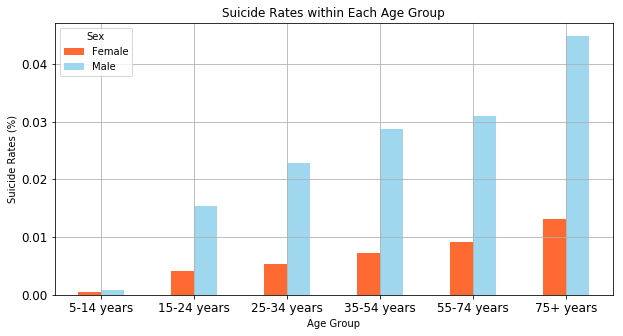

In [18]:
# Plot Suicides Rates by Age Group

suicide_rate.plot(kind="bar", rot = 0, figsize = (10,5), 
                 color = ["orangered","skyblue"], fontsize = 12, alpha = 0.8)

plt.legend(["Female","Male"],title="Sex")
plt.title("Suicide Rates within Each Age Group")
plt.xlabel("Age Group")
plt.ylabel("Suicide Rates (%)")
plt.grid()
plt.savefig("Images/age_group_rates.png", bbox_inches = "tight")

plt.show()

In [19]:
# Number of Suicides by Gender

sex_group = sub_data.groupby(["sex"])
sum_by_sex = pd.DataFrame(sex_group["suicides_no"].sum())
sum_by_sex

,suicides_no
sex,
female,1081921
male,3625386


<Figure size 432x288 with 0 Axes>

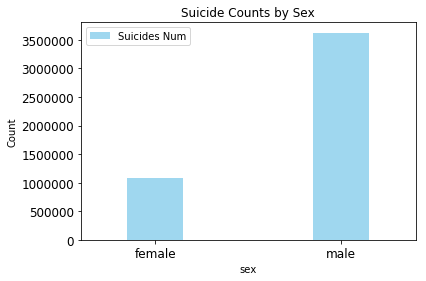

In [20]:
# Plot Number of Suicides by Gender

plt.figure()

sum_by_sex.plot(kind = "bar", color = "skyblue", width = 0.3, alpha = 0.8, rot = 0, fontsize = 12)
plt.title("Suicide Counts by Sex")
plt.ylabel("Count")
plt.legend(["Suicides Num"],loc="best")
plt.savefig("Images/sex_group_counts.png", bbox_inches = "tight")
plt.show()

In [21]:
# Suicide Rates by Gender 

rate_by_sex = pd.DataFrame({"suicide_rates_%": sex_group["suicides_no"].sum()/sex_group["population"].sum()*100})
rate_by_sex

,suicide_rates_%
sex,
female,0.006216
male,0.021910


<Figure size 432x288 with 0 Axes>

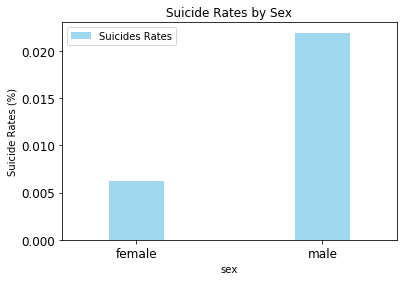

In [22]:
# Plot Suicide Rates by Gender

plt.figure()

rate_by_sex.plot(kind = "bar", color = "skyblue", width = 0.3, alpha = 0.8, rot = 0, fontsize = 12)
plt.title("Suicide Rates by Sex")
plt.ylabel("Suicide Rates (%)")
plt.legend(["Suicides Rates"],loc="best")
plt.savefig("Images/sex_group_rates.png", bbox_inches = "tight")
plt.show()

In [23]:
# Perform two sample T-Test on female and male data

In [24]:
df_female = sub_data.loc[sub_data["sex"] == "female", :]
df_male = sub_data.loc[sub_data["sex"] == "male", :]

stats.ttest_ind(df_female["suicides_no"], df_male["suicides_no"], equal_var=False)

Ttest_indResult(statistic=-18.76678543083263, pvalue=1.457542644160781e-76)

In [25]:
stats.ttest_ind(df_female["suicides/100k pop"], df_male["suicides/100k pop"], equal_var=False)

Ttest_indResult(statistic=-51.72344966551411, pvalue=0.0)

In [26]:
# Male to Female Suicides Ratio

suicide_sum["male_to_female_ratio"] = suicide_sum["male"]//suicide_sum["female"]
suicide_sum

sex,female,male,male_to_female_ratio
age,,,
5-14 years,11519,24501,2
15-24 years,113466,435073,3
25-34 years,143549,631340,4
35-54 years,355754,1368261,3
55-74 years,297580,859581,2
75+ years,160053,306630,1


# Location

In [27]:
# get data from 2010 to 2014
file_2010_2014 = "data/sub_dataset_2010-2014.csv"
data_2010_2014 = pd.read_csv(file_2010_2014, encoding = "ISO-8859-1")
data_2010_2014.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Mexico,2010,male,75+ years,165,1187437,13.90,Mexico2010,0.746,"1,057,801,282,051",9991,Silent
1,Mexico,2010,male,25-34 years,936,9704369,9.65,Mexico2010,0.746,"1,057,801,282,051",9991,Generation X
2,Mexico,2010,male,15-24 years,1074,11192708,9.60,Mexico2010,0.746,"1,057,801,282,051",9991,Millenials
3,Mexico,2010,male,35-54 years,1191,13117850,9.08,Mexico2010,0.746,"1,057,801,282,051",9991,Generation X
4,Mexico,2010,male,55-74 years,483,5353293,9.02,Mexico2010,0.746,"1,057,801,282,051",9991,Silent


In [28]:
# calculate total number of suicides and population of each country during this 5 years
rate_2010_2014 = data_2010_2014.groupby(["country"])
rate_2010_2014 = rate_2010_2014.sum()
rate_2010_2014.head()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
country,,,,,,
Argentina,120720,15321,192171651,551.70,49.548,804336
Armenia,120720,344,13774584,184.45,43.632,229560
Australia,120720,12891,106496133,693.28,55.884,4007892
Austria,120720,6433,40215623,1047.61,52.956,3139080
Bahrain,120720,70,5872858,44.54,49.200,1542396


In [29]:
# add a column and calculate total suicides rate of each country during this 5 years
rate_2010_2014["suicides_rate_%"] = rate_2010_2014["suicides_no"]/rate_2010_2014["population"]*100
rate_2010_2014 = rate_2010_2014[["suicides_no","population","suicides_rate_%"]]

# add 2 columns for lat and lng 
rate_2010_2014["lat"]= ""
rate_2010_2014["lng"]= ""
rate_2010_2014.head()

,suicides_no,population,suicides_rate_%,lat,lng
country,,,,,
Argentina,15321,192171651,0.007973,,
Armenia,344,13774584,0.002497,,
Australia,12891,106496133,0.012105,,
Austria,6433,40215623,0.015996,,
Bahrain,70,5872858,0.001192,,


In [30]:
from config import gkey
import gmaps
gmaps.configure(api_key=gkey)
import json
import requests

In [31]:
# Loop through the countries and run a lat/long search for each city
# save lat and lng data to rate_2010_2014
for index, row in rate_2010_2014.iterrows():
      
    country = index
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
              'address={0}&key={1}').format(country, gkey)
   
    try:
        response = requests.get(target_url).json()
        lat = response['results'][0]["geometry"]["location"]["lat"]
        lng = response['results'][0]["geometry"]["location"]["lng"]

        rate_2010_2014.loc[index, "lat"] = lat
        rate_2010_2014.loc[index, "lng"] = lng
    except :
        print(country)

rate_2010_2014.head()

,suicides_no,population,suicides_rate_%,lat,lng
country,,,,,
Argentina,15321,192171651,0.007973,-38.4161,-63.6167
Armenia,344,13774584,0.002497,40.0691,45.0382
Australia,12891,106496133,0.012105,-25.2744,133.775
Austria,6433,40215623,0.015996,47.5162,14.5501
Bahrain,70,5872858,0.001192,26.0667,50.5577


In [32]:
# reset the index
rate_general_2010_2014 = rate_2010_2014.reset_index()
rate_general_2010_2014.head()

,country,suicides_no,population,suicides_rate_%,lat,lng
0,Argentina,15321,192171651,0.007973,-38.4161,-63.6167
1,Armenia,344,13774584,0.002497,40.0691,45.0382
2,Australia,12891,106496133,0.012105,-25.2744,133.775
3,Austria,6433,40215623,0.015996,47.5162,14.5501
4,Bahrain,70,5872858,0.001192,26.0667,50.5577


In [33]:
# save the df to csv file
rate_general_2010_2014.to_csv("data/dataset_attd_2010_2014.csv", encoding = "utf-8", index = True, header = True)

In [34]:
# get data from dataset_attd_2010_2014.csv
file_att = "data/dataset_attd_2010_2014.csv"
rate_general_2010_2014 = pd.read_csv(file_att, encoding = "ISO-8859-1")
rate_general_2010_2014.head()

,Unnamed: 0,country,suicides_no,population,suicides_rate_%,lat,lng
0,0,Argentina,15321,192171651,0.007973,-38.416097,-63.616672
1,1,Armenia,344,13774584,0.002497,40.069099,45.038189
2,2,Australia,12891,106496133,0.012105,-25.274398,133.775136
3,3,Austria,6433,40215623,0.015996,47.516231,14.550072
4,4,Bahrain,70,5872858,0.001192,26.066700,50.557700


In [35]:
# sort data by suicides rate
rate_general_2010_2014_rank = rate_general_2010_2014.sort_values("suicides_rate_%", ascending=False)
rate_general_2010_2014_rank.head()

,Unnamed: 0,country,suicides_no,population,suicides_rate_%,lat,lng
37,37,Lithuania,4978,14255516,0.034920,55.169438,23.881275
51,51,Republic of Korea,73883,240131758,0.030768,35.907757,127.766922
62,62,Suriname,655,2434597,0.026904,3.919305,-56.027783
27,27,Hungary,11275,47308825,0.023833,47.162494,19.503304
33,33,Kazakhstan,16881,75234292,0.022438,48.019573,66.923684


In [36]:
# save the top 3 to "top3"
rate_general_2010_2014_rank = rate_general_2010_2014_rank.reset_index(drop = True)
rate_general_2010_2014_rank
top3 = rate_general_2010_2014_rank.iloc[0:3,:]
top3

,Unnamed: 0,country,suicides_no,population,suicides_rate_%,lat,lng
0,37,Lithuania,4978,14255516,0.034920,55.169438,23.881275
1,51,Republic of Korea,73883,240131758,0.030768,35.907757,127.766922
2,62,Suriname,655,2434597,0.026904,3.919305,-56.027783


In [37]:
# save the bottom 3 to "bottom3"
bottom3 = rate_general_2010_2014_rank.iloc[68:71,:]
bottom3

,Unnamed: 0,country,suicides_no,population,suicides_rate_%,lat,lng
68,4,Bahrain,70,5872858,0.001192,26.066700,50.557700
69,60,South Africa,2405,237572023,0.001012,-30.559482,22.937506
70,25,Grenada,3,477777,0.000628,12.116500,-61.679000


In [38]:
# combine the top3 and bottom 3 as top_bottom
top_bottom = pd.concat([top3,bottom3])
top_bottom

,Unnamed: 0,country,suicides_no,population,suicides_rate_%,lat,lng
0,37,Lithuania,4978,14255516,0.034920,55.169438,23.881275
1,51,Republic of Korea,73883,240131758,0.030768,35.907757,127.766922
2,62,Suriname,655,2434597,0.026904,3.919305,-56.027783
68,4,Bahrain,70,5872858,0.001192,26.066700,50.557700
69,60,South Africa,2405,237572023,0.001012,-30.559482,22.937506
70,25,Grenada,3,477777,0.000628,12.116500,-61.679000


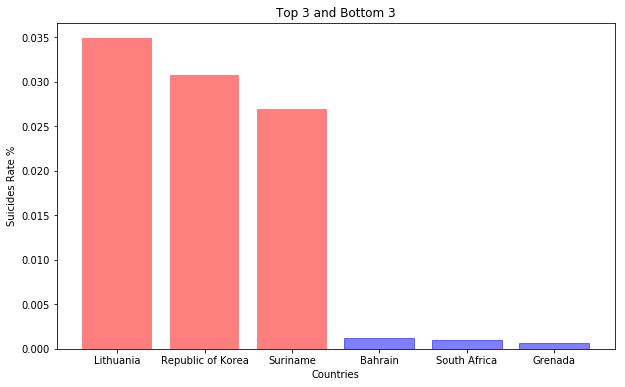

In [39]:
# plot the top 3 and bottom 3
plt.figure(figsize=(10,6))
top_bottom_plot = plt.bar(top_bottom['country'], top_bottom["suicides_rate_%"], color='r', alpha=0.5, align="center")

plt.xlabel("Countries")
plt.ylabel("Suicides Rate %")
plt.title("Top 3 and Bottom 3")

top_bottom_plot[3].set_color('b')
top_bottom_plot[4].set_color('b')
top_bottom_plot[5].set_color('b')

#save the figure
plt.savefig("Images/Location_top_bottom.png")

In [56]:
# Plot Heatmap
locations_71 = rate_general_2010_2014[["lat", "lng"]]
suicides_rate_71 = rate_general_2010_2014["suicides_rate_%"].astype(float)

fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations_71, weights=suicides_rate_71 * 1000000,dissipating=False, max_intensity=10000,point_radius=1)

# Add layer
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [57]:
# read data from "Countries of the world"
file_region_71 = "Data/Countries of the world.xls"
region_71 = pd.read_excel(file_region_71, encoding = "ISO-8859-1")
region_71.head()

,Country,Region,Population,Area sq. mi.,Pop. Density per sq. mi.,Coastline coast/area ratio,Net migration,Infant mortality per 1000 births,GDP $ per capita,Literacy %,Phones per 1000,Arable %,Crops%,Other%,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,47.96,0.00,23.06,163.07,700.0,36.0,3.22,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.59,1.26,-4.93,21.52,4500.0,86.5,71.20,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.83,0.04,-0.39,31.00,6000.0,70.0,78.10,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.42,58.29,-20.71,9.27,8000.0,97.0,259.54,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.14,0.00,6.60,4.05,19000.0,100.0,497.18,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [58]:
# remove space in column "country" of "region_71" and "Country" of "rate_general_2010_2014"
region_71['Country'] = region_71["Country"].str.strip()
rate_general_2010_2014['country'] = rate_general_2010_2014["country"].str.strip()

In [59]:
# merge "region_71" and "rate_general_2010_2014"
data_merged_71 = pd.merge(rate_general_2010_2014,region_71,left_on = "country",right_on = "Country", how = "inner")
data_merged_71.head()

,Unnamed: 0,country,suicides_no,population,suicides_rate_%,lat,lng,Country,Region,Population,...,Phones per 1000,Arable %,Crops%,Other%,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,Argentina,15321,192171651,0.007973,-38.416097,-63.616672,Argentina,LATIN AMER. & CARIB,39921833,...,220.43,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
1,1,Armenia,344,13774584,0.002497,40.069099,45.038189,Armenia,C.W. OF IND. STATES,2976372,...,195.71,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418
2,2,Australia,12891,106496133,0.012105,-25.274398,133.775136,Australia,OCEANIA,20264082,...,565.53,6.55,0.04,93.41,1.0,12.14,7.51,0.038,0.262,0.700
3,3,Austria,6433,40215623,0.015996,47.516231,14.550072,Austria,WESTERN EUROPE,8192880,...,452.22,16.91,0.86,82.23,3.0,8.74,9.76,0.018,0.304,0.678
4,4,Bahrain,70,5872858,0.001192,26.066700,50.557700,Bahrain,NEAR EAST,698585,...,281.28,2.82,5.63,91.55,1.0,17.80,4.14,0.005,0.387,0.608


In [60]:
# check which country is left after merge
list1 = data_merged_71["country"].tolist()
list2 = rate_general_2010_2014["country"].tolist()

for x in list2:
    if x not in list1:
        print(x)

In [61]:
# read data from "country-and-continent.csv"
file_continent = "Data/country-and-continent.csv"
continent = pd.read_csv(file_continent, encoding = "ISO-8859-1")
continent.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


In [62]:
# split the "Country_Name" of "continent" and save to new
new= continent["Country_Name"].str.split(",", n = 1, expand = True) 
 
# add the first column of "new" to "CountryName" in "continent"
continent["CountryName"]= new[0] 
continent.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number,CountryName
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0,Afghanistan
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0,Albania
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0,Antarctica (the territory South of 60 deg S)
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0,Algeria
4,Oceania,OC,American Samoa,AS,ASM,16.0,American Samoa


In [63]:
# Merge "continent" with "data_merged_71"
data_complete = pd.merge(data_merged_71,continent,left_on = "country",right_on = "CountryName", how = "inner")

In [64]:
# list the columns of "data_complete"
data_complete.columns

Index(['Unnamed: 0', 'country', 'suicides_no', 'population', 'suicides_rate_%',
       'lat', 'lng', 'Country', 'Region', 'Population', 'Area sq. mi.',
       'Pop. Density per sq. mi.', 'Coastline coast/area ratio',
       'Net migration', 'Infant mortality per 1000 births', 'GDP $ per capita',
       'Literacy %', 'Phones per 1000', 'Arable %', 'Crops%', 'Other%',
       'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry',
       'Service', 'Continent_Name', 'Continent_Code', 'Country_Name',
       'Two_Letter_Country_Code', 'Three_Letter_Country_Code',
       'Country_Number', 'CountryName'],
      dtype='object')

In [65]:
# remove unuseful columns
data_complete = data_complete[['country','CountryName', 'suicides_no', 'population', 'suicides_rate_%', 'lat', 'lng',
       'Country', 'Region', 'Population', 'Area sq. mi.',
       'Pop. Density per sq. mi.', 'Coastline coast/area ratio',
       'Climate', 'Agriculture', 'Industry',
       'Service', 'Continent_Name','Country_Name']]

In [66]:
data_complete.head(3)

,country,CountryName,suicides_no,population,suicides_rate_%,lat,lng,Country,Region,Population,Area sq. mi.,Pop. Density per sq. mi.,Coastline coast/area ratio,Climate,Agriculture,Industry,Service,Continent_Name,Country_Name
0,Argentina,Argentina,15321,192171651,0.007973,-38.416097,-63.616672,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.43,0.18,3.0,0.095,0.358,0.547,South America,"Argentina, Argentine Republic"
1,Armenia,Armenia,344,13774584,0.002497,40.069099,45.038189,Armenia,C.W. OF IND. STATES,2976372,29800,99.88,0.00,4.0,0.239,0.343,0.418,Europe,"Armenia, Republic of"
2,Armenia,Armenia,344,13774584,0.002497,40.069099,45.038189,Armenia,C.W. OF IND. STATES,2976372,29800,99.88,0.00,4.0,0.239,0.343,0.418,Asia,"Armenia, Republic of"


In [67]:
# Delete the country that show twice
data_complete = data_complete.drop(data_complete[(data_complete['country'] == "Armenia") & (data_complete['Continent_Name'] == "Asia")].index)
data_complete = data_complete.drop(data_complete[(data_complete['country'] == "Cyprus") & (data_complete['Continent_Name'] == "Asia")].index)
data_complete = data_complete.drop(data_complete[(data_complete['country'] == "Turkey") & (data_complete['Continent_Name'] == "Europe")].index)
data_complete = data_complete.drop(data_complete[(data_complete['country'] == "Kazakhstan") & (data_complete['Continent_Name'] == "Europe")].index)
data_complete = data_complete.drop(data_complete[(data_complete['country'] == "Russian Federation") & (data_complete['Continent_Name'] == "Asia")].index)
data_complete = data_complete.drop(data_complete[(data_complete['country'] == "Georgia") & (data_complete['Continent_Name'] == "Asia")].index)

In [68]:
# Check if each country shows only once
data_complete["country"].value_counts()

Cyprus                          1
Portugal                        1
Thailand                        1
Australia                       1
Finland                         1
Luxembourg                      1
Armenia                         1
Germany                         1
Republic of Korea               1
Slovenia                        1
South Africa                    1
El Salvador                     1
United States                   1
Puerto Rico                     1
Latvia                          1
France                          1
Israel                          1
Kuwait                          1
Ecuador                         1
Costa Rica                      1
Bulgaria                        1
Seychelles                      1
Denmark                         1
Japan                           1
Brazil                          1
Russian Federation              1
Argentina                       1
Nicaragua                       1
Switzerland                     1
Qatar         

In [69]:
# Check which country is left after merge
list1 = data_complete["country"].tolist()
list2 = data_merged_71["country"].tolist()

for x in list2:
    if x not in list1:
        print(x)

In [70]:
# save the df to csv file
data_complete.to_csv("Data/data_complete.csv", encoding = "utf-8", index = True, header = True)

In [71]:
# classify countries by continent 
continent_count = pd.DataFrame(data_complete["Continent_Name"].value_counts())
continent_count = continent_count.rename(columns={"Continent_Name":"Continent"})
continent_count

,Continent
Europe,34
North America,13
Asia,13
South America,7
Africa,3
Oceania,1


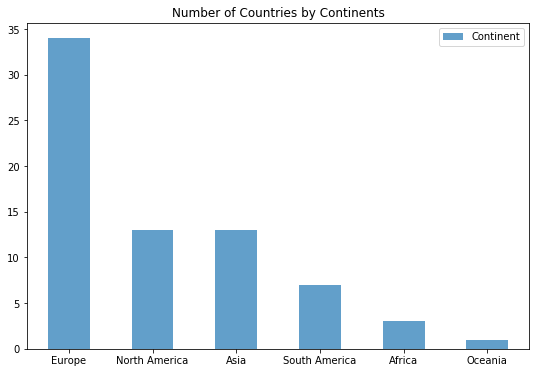

In [72]:
# Plot the target dataset in terms of which countries are included
continent_plot = continent_count.plot(kind="bar", figsize=(9,6),alpha=0.7)
plt.xticks(rotation = 0)
plt.title("Number of Countries by Continents")
plt

# Save the figure
plt.savefig("Images/Location_countries_analyzed.png")

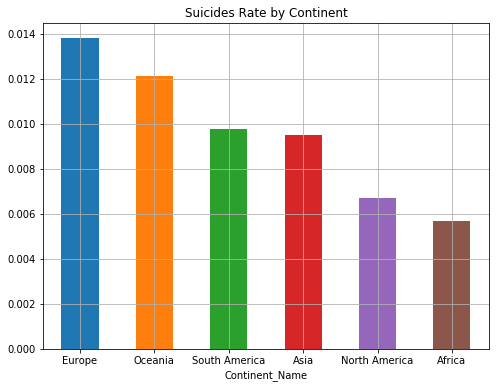

In [73]:
# Plot bar chart to show mean suicides rate of each continent
group_by_continent = data_complete.groupby(data_complete["Continent_Name"])
mean_continent = group_by_continent["suicides_rate_%"].mean()
mean_continent.sort_values(inplace=True, ascending=False)
conti_plot = mean_continent.plot(kind="bar", grid=True, figsize=(8,6),
              title="Suicides Rate by Continent")
plt.xticks(rotation = 0)

# Save the figure
plt.savefig("Images/Location_continent.png")

 The R-value is -0.05378617649742869


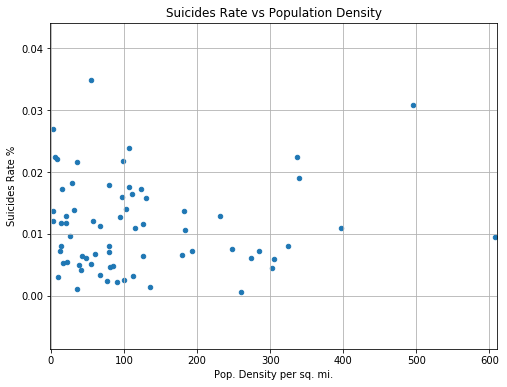

In [74]:
# plot scatter chart show relation between suicides rate and population density
area_plot = data_complete.plot(kind="scatter", x="Pop. Density per sq. mi.", y="suicides_rate_%", grid=True, figsize=(8,6),
              title="Suicides Rate vs Population Density")
plt.ylabel("Suicides Rate %")
plt.xlim(-0.75, 610)

# Calculate correlation coefficient
cc_popden = data_complete["suicides_rate_%"].corr(data_complete["Pop. Density per sq. mi."])
print(f" The R-value is {cc_popden}")

# Save the figure
plt.savefig("Images/Location_PopulationDensity.png")

 The R-value is -0.19992403762318114


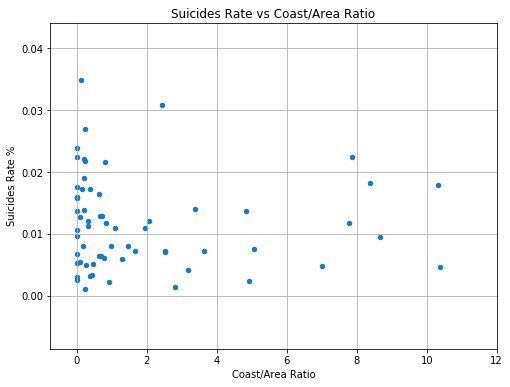

In [75]:
# plot scatter chart show relation between suicides rate and coast/area ratio
coast_plot = data_complete.plot(kind="scatter", x="Coastline coast/area ratio", y="suicides_rate_%", grid=True, figsize=(8,6),
              title="Suicides Rate vs Coast/Area Ratio")
plt.xlim(-0.75, 12)
plt.ylabel("Suicides Rate %")
plt.xlabel("Coast/Area Ratio")

# Calculate correlation coefficient
cc_coast_area = data_complete["suicides_rate_%"].corr(data_complete["Coastline coast/area ratio"])
print(f" The R-value is {cc_coast_area}")

# Save the figure
plt.savefig("Images/Location_CoastAreaRatio.png")

 The R-value is -0.009798224440008546


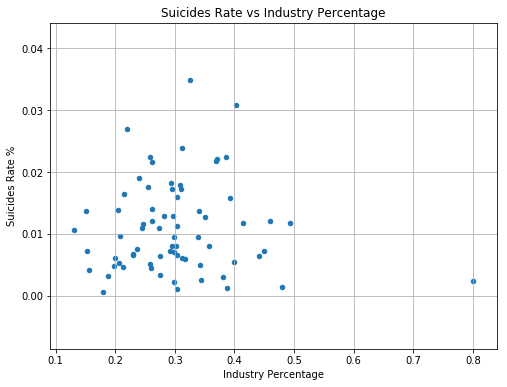

In [76]:
# plot scatter chart show relation between suicides rate and Industry Percentage
agri_plot = data_complete.plot(kind="scatter", x="Industry", y="suicides_rate_%", grid=True, figsize=(8,6),
              title="Suicides Rate vs Industry Percentage")
plt.ylabel("Suicides Rate %")
plt.xlabel("Industry Percentage")

# Calculate correlation coefficient
cc_IndPercentage = data_complete["suicides_rate_%"].corr(data_complete["Industry"])
print(f" The R-value is {cc_IndPercentage}")

# Save the figure
plt.savefig("Images/Location_Industry.png")

In [77]:
# Calculate the average suicides rate for each climate type
group_by_climate = data_complete.groupby(data_complete["Climate"])
mean_climate = group_by_climate["suicides_rate_%"].mean()

 The R-value is 0.4996339237259806


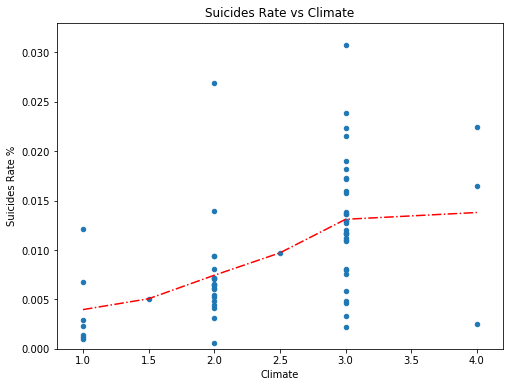

In [79]:
# plot scatter chart show relation between suicides rate and climate
ax = data_complete.plot(kind="scatter", x="Climate", y="suicides_rate_%", grid=True, figsize=(8,6),
              title="Suicides Rate vs Climate")

# Add a line show mean value
mean_climate.plot(kind = "line",ax = ax,color='red',linestyle = "-.")
ax.set_ylim(bottom = 0.0,ymax = 0.033)
ax.set_xlim(xmin=0.8, xmax=4.2)
plt.ylabel("Suicides Rate %")

# Calculate correlation coefficient
cc_climate = data_complete["suicides_rate_%"].corr(data_complete["Climate"])
print(f" The R-value is {cc_climate}")

# Save the figure
plt.savefig("Images/Location_Climate.png")

In [80]:
# convert data of lat to float
data_complete["lat"] = data_complete["lat"].astype(float)

In [81]:
from scipy.stats import linregress

 The R-value is 0.4140023417521081


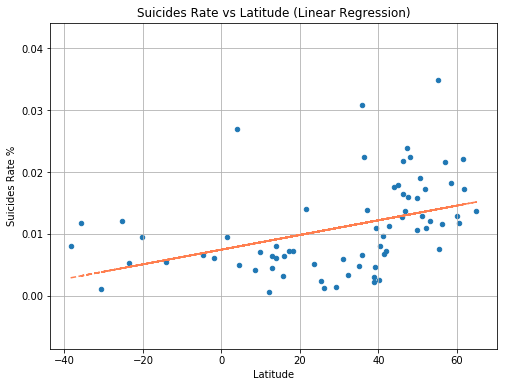

In [82]:
# plot scatter chart show relation between suicides rate and latitude
ax = data_complete.plot(kind="scatter", x="lat", y="suicides_rate_%", grid=True, figsize=(8,6),
              title="Suicides Rate vs Latitude (Linear Regression)")

# Linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(data_complete['lat'], data_complete['suicides_rate_%'])
fit = slope * data_complete['lat'] + intercept
ax.plot(data_complete['lat'],fit,"b--",color = "coral")
plt.ylabel("Suicides Rate %")
plt.xlabel("Latitude")

# get R-value
print(f" The R-value is {r_value}")

# Save the figure
plt.savefig("Images/Location_lat_linear.png")

[ 0.00613357 -0.01654931]


0   -0.004725
1    0.009407
3   -0.008068
4   -0.002531
5    0.008250
dtype: float64

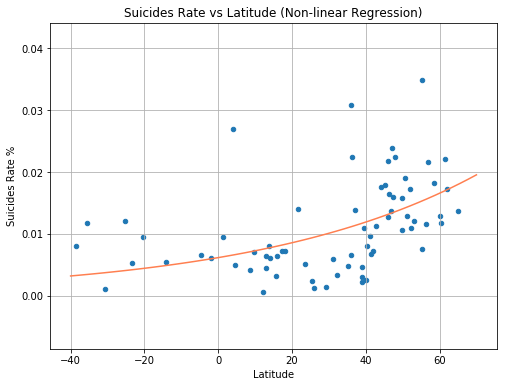

In [83]:
# Non-Linear regression
from scipy.optimize import curve_fit

ax = data_complete.plot(kind="scatter", x="lat", y="suicides_rate_%", grid=True, figsize=(8,6),
              title="Suicides Rate vs Latitude (Non-linear Regression)")

def model(z, a, b):
    return a * np.exp(-b * z)

x_axis = data_complete["lat"]
y_axis = data_complete["suicides_rate_%"]

popt, pcov = curve_fit(model, x_axis, y_axis, p0=(5, 0.1))

# prepare some data for a plot
xx = np.linspace(-40, 70)
yy = model(xx, *popt)

ax.plot(xx,yy, '-',color = "coral")

r_value = model(x_axis, *popt) - y_axis
model_y = model(x_axis, *popt)

plt.ylabel("Suicides Rate %")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("Images/Location_lat_expo.png")

print(popt)
r_value.head()

In [84]:
# exponential model analysis
# calculate the mean value for "lat" and "suicides_rate_%"
data_analysis = pd.DataFrame(x_axis)
data_analysis["suicides_rate_%"]=data_complete["suicides_rate_%"]
x_mean = data_analysis["lat"].mean()
y_mean = data_analysis["suicides_rate_%"].mean()

In [85]:
# exponential model analysis
# calculate r-square
data_analysis["model_y"] = model_y
data_analysis["r_value"] = r_value

data_analysis["(y-y_mean)2"] = (data_analysis["suicides_rate_%"]-y_mean)**2
ss_tot = data_analysis["(y-y_mean)2"].sum()

data_analysis["(y_model-y_mean)2"] = (data_analysis["model_y"]-y_mean)**2
ss_reg = data_analysis["(y_model-y_mean)2"].sum()

data_analysis["(r_value)2"] = (data_analysis["r_value"])**2
ss_res = data_analysis["(r_value)2"].sum()

r_square = 1-(ss_res/ss_tot)
print(f" The R-square for this model is {r_square}")

data_analysis.head()

 The R-square for this model is 0.21912828119466488


,lat,suicides_rate_%,model_y,r_value,(y-y_mean)2,(y_model-y_mean)2,(r_value)2
0,-38.416097,0.007973,0.003248,-0.004725,0.000009,5.935566e-05,0.000022
1,40.069099,0.002497,0.011904,0.009407,0.000071,9.063649e-07,0.000088
3,-25.274398,0.012105,0.004037,-0.008068,0.000001,4.781977e-05,0.000065
4,47.516231,0.015996,0.013466,-0.002531,0.000025,6.317212e-06,0.000006
5,26.066700,0.001192,0.009442,0.008250,0.000095,2.280809e-06,0.000068


In [86]:
# linear model analysis
data_analysis_1 = pd.DataFrame(x_axis)
data_analysis_1["suicides_rate_%"]=data_complete["suicides_rate_%"]

data_analysis_1["model_y"] = fit
data_analysis_1["r_value"] = data_analysis_1["model_y"] - data_analysis_1["suicides_rate_%"]

data_analysis_1["(y-y_mean)2"] = (data_analysis_1["suicides_rate_%"]-y_mean)**2
ss_tot = data_analysis_1["(y-y_mean)2"].sum()

data_analysis_1["(y_model-y_mean)2"] = (data_analysis_1["model_y"]-y_mean)**2
ss_reg = data_analysis_1["(y_model-y_mean)2"].sum()

data_analysis_1["(r_value)2"] = (data_analysis_1["r_value"])**2
ss_res = data_analysis_1["(r_value)2"].sum()

r_square = 1-(ss_res/ss_tot)
print(f" The R-square for this model is {r_square}")

data_analysis_1.head()

 The R-square for this model is 0.17139793897622924


,lat,suicides_rate_%,model_y,r_value,(y-y_mean)2,(y_model-y_mean)2,(r_value)2
0,-38.416097,0.007973,0.002863,-0.005109,0.000009,6.543214e-05,0.000026
1,40.069099,0.002497,0.012188,0.009690,0.000071,1.526025e-06,0.000094
3,-25.274398,0.012105,0.004424,-0.007680,0.000001,4.261126e-05,0.000059
4,47.516231,0.015996,0.013072,-0.002924,0.000025,4.494702e-06,0.000009
5,26.066700,0.001192,0.010524,0.009332,0.000095,1.833672e-07,0.000087


# Economy Analysis (GDP)

In [100]:
# Read source data again for GDP 
file = "data/sub_dataset.csv"
datagdp =pd.read_csv(file)
datagdp.head()

# sorting by country, year and sex
datagdp.sort_values(["country","year","sex"],inplace = True) 
  
# # dropping ALL duplicte rows 
datagdp.drop_duplicates(subset =['country',' gdp_for_year ($) ','gdp_per_capita ($)'],keep = 'first', inplace = True) 

# Sum up suicide_no per year
grouped_per_year = datagdp.groupby('year')

# Sum up GDP per year
gdp = grouped_per_year['gdp_per_capita ($)'].sum()

# x axis is year 
yeardata = datagdp['year'].unique()

# Suicices Group by Year  (from earlier analysis)
groupby_yr=data.groupby("year")
year_sum = groupby_yr["suicides_no"].sum()
year_sum.head()

total_rate=year_sum/total_population

# Suicides rate (%)
suicides = total_rate*100

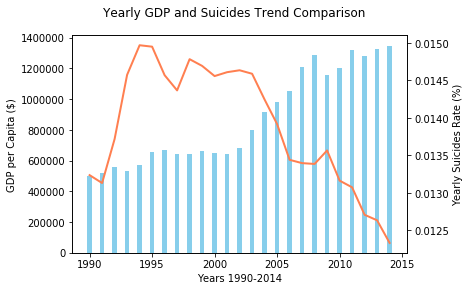

In [101]:
# Plot GDP and Suicide Rate yearly 

width = .35 # width of a bar

m1_t = pd.DataFrame({
 'gdp' : gdp,
 'suicides' : suicides})

m1_t = m1_t.reset_index()


fig, ax = plt.subplots()
fig.suptitle('Yearly GDP and Suicides Trend Comparison')
ax1 = plt.gca()   
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax1.bar(x =m1_t['year'], height = m1_t['gdp'], width = width, color ='skyblue')

ax2.plot(m1_t['year'], m1_t['suicides'] ,color ='Coral', lw=2, ls='-')

ax.set(xlabel='Years 1990-2014', ylabel='GDP per Capita ($)')
ax2.set(ylabel='Yearly Suicides Rate (%)')

plt.savefig('Images/Yearly GDP and Suicides Trend Comparison.png',bbox_inches='tight')

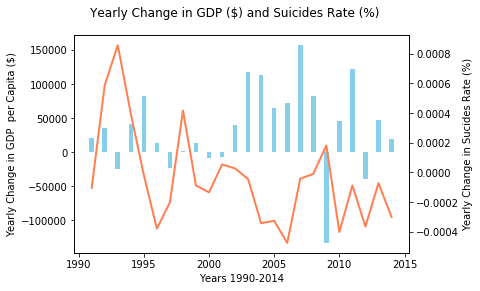

In [102]:
# Yearly Change analyis of GDP and Suicides Rate

#Find First discrete difference of  series Suicides and GDP
# Shift 1 period to calculate difference ---> yearly difference (GDP growth/decrease)
s_diff = suicides.diff()
g_diff = gdp.diff()


m2_t = pd.DataFrame({
 'gdp_diff' : g_diff,
 'suicides_diff' : s_diff})

m2_t = m2_t.reset_index()
m2_t.head()

fig, ax1 = plt.subplots()
fig.suptitle('Yearly Change in GDP ($) and Suicides Rate (%) ')

ax = plt.gca()   
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax1.bar(x =m2_t['year'], height = m2_t['gdp_diff'], width = width, color ='skyblue')
ax2.plot(m2_t['year'], m2_t['suicides_diff'], color ='Coral', lw=2, ls='-')

ax.set(xlabel='Years 1990-2014', ylabel='Yearly Change in GDP  per Capita ($)')
ax2.set(ylabel='Yearly Change in Sucides Rate (%)')

plt.savefig('Images/Yearly Change in GDP ($) and Suicides Rate (%).png',bbox_inches='tight')
plt.show()

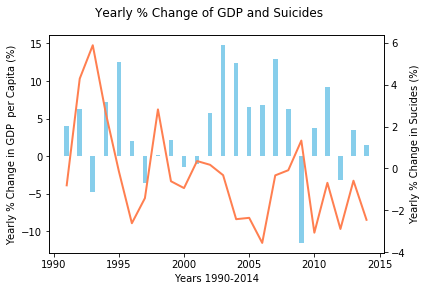

In [105]:
# Yearly Change Rate analyis of GDP and Suicides Rate

# Ratio calculation 
ggrowth = g_diff*100/gdp
sgrowth = s_diff*100/suicides


m3_t = pd.DataFrame({
 'gdp_growth' : g_diff*100/gdp,
 'suicides_growth' : s_diff*100/suicides})

m3_t = m3_t.reset_index()
m3_t.head()

fig, ax1 = plt.subplots()
fig.suptitle('Yearly % Change of GDP and Suicides ')

ax = plt.gca()   
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax1.bar(x =m3_t['year'], height = m3_t['gdp_growth'], width = width, color ='skyblue')
ax2.plot(m3_t['year'], m3_t['suicides_growth'], color ='Coral', lw=2, ls='-')

ax.set(xlabel='Years 1990-2014', ylabel='Yearly % Change in GDP  per Capita (%)')
ax2.set(ylabel='Yearly % Change in Sucides (%)')

plt.savefig('Images/Yearly Change Rate of GDP and Suicides.png',bbox_inches='tight')

plt.show()

In [106]:
# Check m3_t table 
m3_t.head()

# Finding: first value is invalid since no prior year for first year 1990 

,year,gdp_growth,suicides_growth
0,1990,NaN,NaN
1,1991,4.050823,-0.802832
2,1992,6.278963,4.280060
3,1993,-4.797433,5.872146
4,1994,7.232254,2.637517


In [107]:
# drop first value which is invalid  (missing value)
sgrowth= sgrowth.drop(index=[1990])
ggrowth = ggrowth.drop(index=[1990])

sgrowth

year
1991   -0.802832
1992    4.280060
1993    5.872146
1994    2.637517
1995   -0.127447
1996   -2.608373
1997   -1.413605
1998    2.815952
1999   -0.608447
2000   -0.933616
2001    0.355022
2002    0.174886
2003   -0.318816
2004   -2.415611
2005   -2.351344
2006   -3.546440
2007   -0.328015
2008   -0.082547
2009    1.329530
2010   -3.059154
2011   -0.682977
2012   -2.882068
2013   -0.582430
2014   -2.445671
dtype: float64

In [108]:
# Find  statistics for suicides
v1 = np.var(sgrowth)
v1

std1 = np.std(sgrowth)
std1

mean1 = np.mean(sgrowth)
print('Statistics for Suicides change rate data:')
print('-----------------------------------------------------')
print(f'Variance: {v1}   Mean: {mean1} and ')
print(f'Standard Deviation: {std1}')

Statistics for Suicides change rate data:
-----------------------------------------------------
Variance: 5.268286658974087   Mean: -0.3218450742668606 and 
Standard Deviation: 2.2952748547775466


In [109]:
# Find statistics for  GDP
v2 = np.var(ggrowth)
v2

std2 = np.std(ggrowth)
std2

mean2 = np.mean(ggrowth)
print('Statistics for GDP change rate data:')
print('-----------------------------------------------------')
print(f'Variance: {v2}   Mean: {mean2} and')
print(f'Standard Deviation: {std2}')

Statistics for GDP change rate data:
-----------------------------------------------------
Variance: 38.3060028564308   Mean: 3.849968355459069 and
Standard Deviation: 6.1891843450030475


In [110]:
# Coefficient of Variation = Standard deviation / mean 
coef1 = std1/ mean1

coef2  = std2 /mean2 
print(f'Coefficient of Suicides change rate: {coef1}   and Coefficient of GDP change rate: {coef2} ')  

Coefficient of Suicides change rate: -7.1316140537679935   and Coefficient of GDP change rate: 1.607593562743726 


### Coefficient difference is evident and important 
* Opposite sign （resulting from negative mean of Suicides Rate change rate)
* Different absolute value : -7.131614 and 1.60759356

```However when coefficient is a negative value , its representation and comparison power with another positive mean population is limited, thus it is elimited from final presentation```

# Null hypothesis: 
Suicides evolution is not significantly related to GDP evolution. 

# Hypothesis:
Suicides evolution is significantly influenced by GDP evolution. 


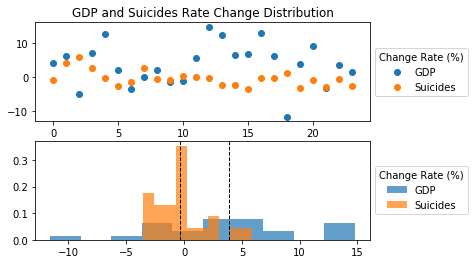

In [111]:
fig, ax = plt.subplots()


# Scatter Plot of Data
plt.subplot(2,1,1)
plt.scatter(range(len(ggrowth)), ggrowth, label="GDP")
plt.scatter(range(len(sgrowth)), sgrowth, label="Suicides")

# Create a legend
plt.legend(title="Change Rate (%)", fancybox=True, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('GDP and Suicides Rate Change Distribution')

# Histogram Plot of Data
plt.subplot(2,1,2)
plt.hist(ggrowth, 10, density=True, alpha=0.7, label="GDP")
plt.hist(sgrowth, 10, density=True, alpha=0.7, label="Suicides")
plt.axvline(ggrowth.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(sgrowth.mean(), color='k', linestyle='dashed', linewidth=1)

# Create a legend
plt.legend(title="Change Rate (%)", fancybox=True,loc='center left', bbox_to_anchor=(1, 0.5))  #---> define legend box location figure , same for subplot1

plt.savefig('Images/GDP and Suicides Rate Change Distribution.png',bbox_inches='tight')

# ~La Fin~